In [53]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc



shop = pd.read_csv('천안_상권.csv')
food_all = pd.read_csv('천안_일반음식점.csv')
human = pd.read_csv('연령별 인구현황(19년11월).csv')
subway = pd.read_csv('2019년 11월  교통카드 통계자료.csv')

plt.rcParams["font.family"] = 'gulim'

In [2]:
food_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 47 columns):
번호           12315 non-null int64
개방서비스명       12315 non-null object
개방서비스ID      12315 non-null object
개방자치단체코드     12315 non-null int64
관리번호         12315 non-null object
인허가일자        12315 non-null int64
인허가취소일자      0 non-null float64
영업상태구분코드     12315 non-null int64
영업상태명        12315 non-null object
상세영업상태코드     12315 non-null int64
상세영업상태명      12315 non-null object
폐업일자         4973 non-null float64
휴업시작일자       0 non-null float64
휴업종료일자       0 non-null float64
재개업일자        0 non-null float64
소재지전화        7682 non-null object
소재지면적        12040 non-null object
소재지우편번호      12315 non-null int64
소재지전체주소      12315 non-null object
도로명전체주소      12315 non-null object
도로명우편번호      12067 non-null float64
사업장명         12315 non-null object
최종수정시점       12315 non-null float64
데이터갱신구분      12315 non-null object
데이터갱신일자      12315 non-null object
업태구분명        12313 non-null objec

In [3]:
drop_col = ['인허가취소일자', '휴업시작일자', '휴업종료일자', '재개업일자', '총종업원수', '건물소유구분명','전통업소지정번호','전통업소주된음식','홈페이지']

food_all.drop(drop_col, axis=1, inplace=True)

In [4]:
food_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 38 columns):
번호           12315 non-null int64
개방서비스명       12315 non-null object
개방서비스ID      12315 non-null object
개방자치단체코드     12315 non-null int64
관리번호         12315 non-null object
인허가일자        12315 non-null int64
영업상태구분코드     12315 non-null int64
영업상태명        12315 non-null object
상세영업상태코드     12315 non-null int64
상세영업상태명      12315 non-null object
폐업일자         4973 non-null float64
소재지전화        7682 non-null object
소재지면적        12040 non-null object
소재지우편번호      12315 non-null int64
소재지전체주소      12315 non-null object
도로명전체주소      12315 non-null object
도로명우편번호      12067 non-null float64
사업장명         12315 non-null object
최종수정시점       12315 non-null float64
데이터갱신구분      12315 non-null object
데이터갱신일자      12315 non-null object
업태구분명        12313 non-null object
좌표정보(X)      12287 non-null float64
좌표정보(Y)      12287 non-null float64
위생업태명        12313 non-null object
남성종사자수       4034 n

In [5]:
food_open = food_all.loc[food_all['상세영업상태코드']==1]  # 천안 음식점 영업중 인것
food_close = food_all.loc[food_all['상세영업상태코드']==2] # 천안 음식점 폐업한 것 
ch_food_failed = (food_close['번호'].count())/(food_all['번호'].count())*100 
round(ch_food_failed,1)#천안 창업 실패율

40.4

In [6]:
food_all['인허가일자']=pd.to_datetime(food_all['인허가일자'], format='%Y%m%d')
food_all['인허가일자'] #영업 시작일 

0       1995-09-14
1       1997-09-08
2       1998-05-14
3       1997-12-13
4       1998-01-17
           ...    
12310   2016-06-16
12311   2016-06-21
12312   2016-06-23
12313   2016-06-23
12314   2010-08-27
Name: 인허가일자, Length: 12315, dtype: datetime64[ns]

In [7]:
food_all['영업시작년도'] = food_all['인허가일자'].apply(lambda x : x.year)
food_all['영업시작월'] = food_all['인허가일자'].apply(lambda x : x.month)
food_all['영업시작일'] = food_all['인허가일자'].apply(lambda x : x.day)

def season(x) :
    if 3 <= x <= 5 : return '봄'
    elif 6 <= x <= 8 : return '여름'
    elif 9 <= x <= 11 : return '가을'
    else : return '겨울'
    
food_all['영업시작계절'] = food_all['영업시작월'].apply(season)
#영업 시작일 기준으로 계절 나누기
food_all[['인허가일자','영업시작년도','영업시작월','영업시작일','영업시작계절']].head()
#정렬한 데이터 표시

,인허가일자,영업시작년도,영업시작월,영업시작일,영업시작계절
0,1995-09-14,1995,9,14,가을
1,1997-09-08,1997,9,8,가을
2,1998-05-14,1998,5,14,봄
3,1997-12-13,1997,12,13,겨울
4,1998-01-17,1998,1,17,겨울


In [8]:
food_all['폐업일자']=food_all['폐업일자'].fillna(20191128).astype(int)

food_all['폐업일자']=pd.to_datetime(food_all['폐업일자'], format ='%Y%m%d')
#폐업일자 날짜로 정리

In [9]:
food_all['영업일수'] = food_all['폐업일자'] - food_all['인허가일자']
food_all['영업일수'] #영업 시작 일자와 폐업일자로 영업 일수 계산

0       6833 days
1       7358 days
2       6724 days
3       7657 days
4       5848 days
           ...   
12310   1260 days
12311   1255 days
12312   1253 days
12313   1253 days
12314   3380 days
Name: 영업일수, Length: 12315, dtype: timedelta64[ns]

In [10]:
food_all['영업일수'] = food_all['영업일수'].dt.days
food_all['영업일수(년)'] = food_all['영업일수'] / 365
food_all['영업일수(년)']=round(food_all['영업일수(년)'],1)
food_all['영업일수(년)'] #영업 일수로 어느 정도 년수로 하였는지 표시

0        18.7
1        20.2
2        18.4
3        21.0
4        16.0
         ... 
12310     3.5
12311     3.4
12312     3.4
12313     3.4
12314     9.3
Name: 영업일수(년), Length: 12315, dtype: float64

In [11]:
ch_food_mean=(food_all['영업일수(년)'].sum())/(food_all['영업일수(년)'].count())
ch_food_mean=round(ch_food_mean,2) # 평균 영업 년도

<function matplotlib.pyplot.show(*args, **kw)>

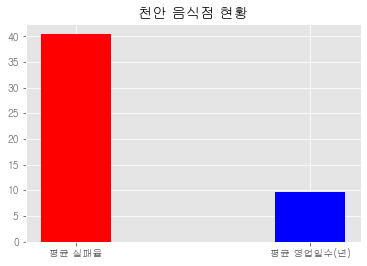

In [12]:
plt.bar(['평균 실패율', '평균 영업일수(년)'], [ch_food_failed, ch_food_mean], 0.3, color=('r' ,'b'))
plt.title("천안 음식점 현황")
plt.show # 평균 실패율과 평균 영업 년도 시각화 표현

In [13]:
food_all['영업일수(년)'] = food_all['영업일수(년)'].apply(lambda x : x)

def year(x) :
    if x < 1 : return '1년미만'
    elif 1 <= x < 3 : return '1~3년'
    elif 3 <= x < 5 : return '3~5년'
    elif 5 <= x < 9 : return '5~9년'
    else : return '9년이상'
    
food_all['영업기간(년)'] = food_all['영업일수(년)'].apply(year)
food_all['영업기간(년)'] # 영업일수를 기간으로 표시

0        9년이상
1        9년이상
2        9년이상
3        9년이상
4        9년이상
         ... 
12310    3~5년
12311    3~5년
12312    3~5년
12313    3~5년
12314    9년이상
Name: 영업기간(년), Length: 12315, dtype: object

In [14]:
food_all['영업기간(년)'].describe() # 종합 어느정도인지 파악

count     12315
unique        5
top        9년이상
freq       5432
Name: 영업기간(년), dtype: object

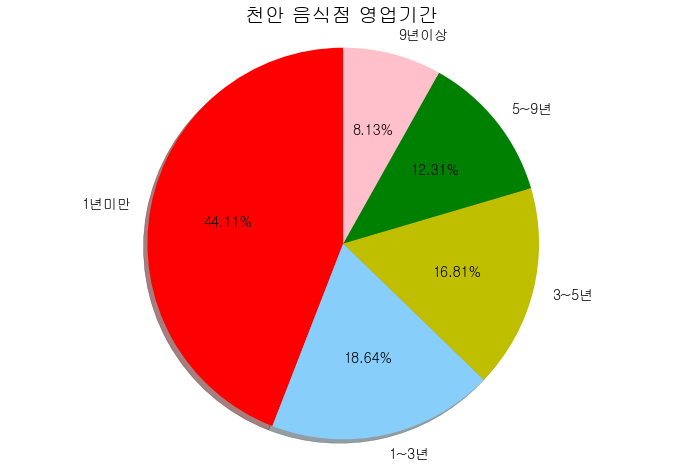

In [15]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['1년미만', '1~3년', '3~5년', '5~9년', '9년이상']
group_sizes = [food_all['영업기간(년)'].value_counts()]
group_colors = ['r', 'lightskyblue', 'y', 'g', 'pink']
group_explodes = (0, 0, 0, 0, 0) # explode 1st slice

plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title('천안 음식점 영업기간', fontsize=20)
plt.show() # 영업 기간 별 시각화 표현

In [16]:
food_all['업태구분명'].describe() # 업태 구분명 종합 조회

count     12313
unique       25
top          한식
freq       5993
Name: 업태구분명, dtype: object

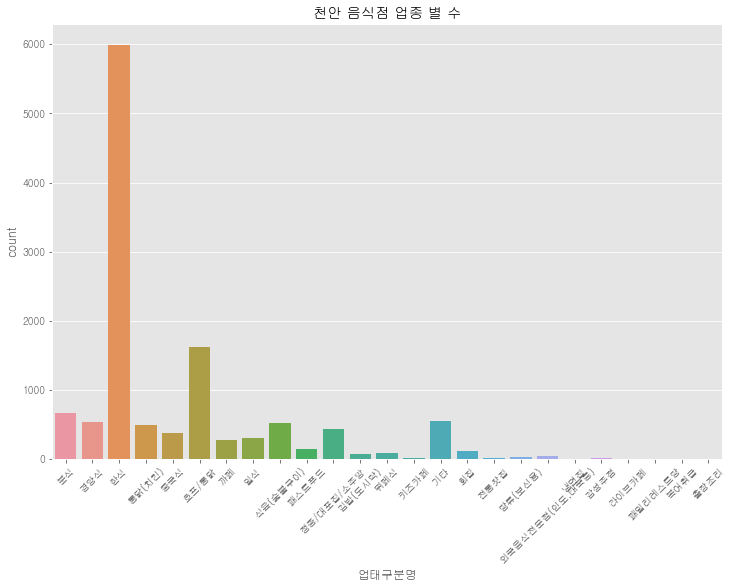

In [17]:
plt.xticks(rotation=45)
sns.countplot(x='업태구분명', data=food_all)
plt.title('천안 음식점 업종 별 수')
plt.show() # 업종 별 갯수 시각화 표현

In [18]:
food_all['업태구분명'].value_counts() # 영업 별 총 개수가 어느정도인지 확인

한식                 5993
호프/통닭              1624
분식                  671
기타                  549
경양식                 535
식육(숯불구이)            523
통닭(치킨)              487
정종/대포집/소주방          429
중국식                 378
일식                  310
까페                  270
패스트푸드               140
회집                  117
뷔페식                  92
김밥(도시락)              71
외국음식전문점(인도,태국등)      45
탕류(보신용)              23
전통찻집                 15
키즈카페                 11
감성주점                  8
라이브카페                 5
냉면집                   5
패밀리레스트랑               5
복어취급                  4
출장조리                  3
Name: 업태구분명, dtype: int64

In [19]:
g = food_all['업태구분명'].value_counts() # 업종 별 데이터 프레임만 따로 저장

In [20]:
g.to_csv("업태구분명_천안시.csv", mode='w') # csv 파일로 저장

In [21]:
food_kind = pd.read_csv('업태구분명_천안시.csv',header=None)
food_kind.rename(columns={food_kind.columns[0]:'업태구분명'},inplace=True)
food_kind.rename(columns={food_kind.columns[1]:'개수'},inplace=True)
food_kind['성공율'] = np.nan
food_kind # csv파일에 헤더 지정 후 업종별 성공율 헤더는 비워둠

,업태구분명,개수,성공율
0,한식,5993,NaN
1,호프/통닭,1624,NaN
2,분식,671,NaN
3,기타,549,NaN
4,경양식,535,NaN
5,식육(숯불구이),523,NaN
6,통닭(치킨),487,NaN
7,정종/대포집/소주방,429,NaN
8,중국식,378,NaN
9,일식,310,NaN


In [22]:
food_all_KF=food_all.loc[food_all['업태구분명']=='한식']
food_KF_open = food_all_KF.loc[food_all_KF['상세영업상태코드']==1]
food_KF_close = food_all_KF.loc[food_all_KF['상세영업상태코드']==2]
ch_KF_food_success = (food_KF_open['번호'].count())/(food_all_KF['번호'].count())*100

food_kind.loc[food_kind['업태구분명']=='한식', ['성공율']] = (round(ch_KF_food_success,2))

food_all_pub=food_all.loc[food_all['업태구분명']=='호프/통닭']
food_pub_open = food_all_pub.loc[food_all_pub['상세영업상태코드']==1] 
ch_pub_food_success = (food_pub_open['번호'].count())/(food_all_pub['번호'].count())*100 
food_kind.loc[food_kind['업태구분명']=='호프/통닭', ['성공율']] = (round(ch_pub_food_success,2))

food_all_FB=food_all.loc[food_all['업태구분명']=='분식']
food_FB_open = food_all_FB.loc[food_all_FB['상세영업상태코드']==1] 
ch_FB_food_success = (food_FB_open['번호'].count())/(food_all_FB['번호'].count())*100 
food_kind.loc[food_kind['업태구분명']=='분식', ['성공율']] = (round(ch_FB_food_success,2))

food_all_etc=food_all.loc[food_all['업태구분명']=='기타']
food_etc_open = food_all_etc.loc[food_all_etc['상세영업상태코드']==1] 
ch_etc_food_success = (food_etc_open['번호'].count())/(food_all_etc['번호'].count())*100 
food_kind.loc[food_kind['업태구분명']=='기타', ['성공율']] = (round(ch_etc_food_success,2))

food_all_ky=food_all.loc[food_all['업태구분명']=='경양식']
food_ky_open = food_all_ky.loc[food_all_ky['상세영업상태코드']==1] 
ch_ky_food_success = (food_ky_open['번호'].count())/(food_all_ky['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='경양식', ['성공율']] = (round(ch_ky_food_success,2))

food_all_meat=food_all.loc[food_all['업태구분명']=='식육(숯불구이)']
food_meat_open = food_all_meat.loc[food_all_meat['상세영업상태코드']==1] 
ch_meat_food_success = (food_meat_open['번호'].count())/(food_all_meat['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='식육(숯불구이)', ['성공율']] = (round(ch_meat_food_success,2))

food_all_chicken=food_all.loc[food_all['업태구분명']=='통닭(치킨)']
food_chicken_open = food_all_chicken.loc[food_all_chicken['상세영업상태코드']==1] 
ch_chicken_food_success = (food_chicken_open['번호'].count())/(food_all_chicken['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='통닭(치킨)', ['성공율']] = (round(ch_chicken_food_success,2))

food_all_soju=food_all.loc[food_all['업태구분명']=='정종/대포집/소주방']
food_soju_open = food_all_soju.loc[food_all_soju['상세영업상태코드']==1] 
ch_soju_food_success = (food_soju_open['번호'].count())/(food_all_soju['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='정종/대포집/소주방', ['성공율']] = (round(ch_soju_food_success,2))

food_all_chinese=food_all.loc[food_all['업태구분명']=='중국식']
food_chinese_open = food_all_chinese.loc[food_all_chinese['상세영업상태코드']==1] 
ch_chinese_food_success = (food_chinese_open['번호'].count())/(food_all_chinese['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='중국식', ['성공율']] = (round(ch_chinese_food_success,2))

food_all_japan=food_all.loc[food_all['업태구분명']=='일식']
food_japan_open = food_all_japan.loc[food_all_japan['상세영업상태코드']==1] 
ch_japan_food_success = (food_japan_open['번호'].count())/(food_all_japan['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='일식', ['성공율']] = (round(ch_japan_food_success,2))

food_all_cafe=food_all.loc[food_all['업태구분명']=='까페']
food_cafe_open = food_all_cafe.loc[food_all_cafe['상세영업상태코드']==1] 
ch_cafe_food_success = (food_cafe_open['번호'].count())/(food_all_cafe['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='까페', ['성공율']] = (round(ch_cafe_food_success,2))

food_all_fast=food_all.loc[food_all['업태구분명']=='패스트푸드']
food_fast_open = food_all_fast.loc[food_all_fast['상세영업상태코드']==1] 
ch_fast_food_success = (food_fast_open['번호'].count())/(food_all_fast['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='패스트푸드', ['성공율']] = (round(ch_fast_food_success,2))

food_all_sushi=food_all.loc[food_all['업태구분명']=='회집']
food_sushi_open = food_all_sushi.loc[food_all_sushi['상세영업상태코드']==1] 
ch_sushi_food_success = (food_sushi_open['번호'].count())/(food_all_sushi['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='회집', ['성공율']] = (round(ch_sushi_food_success,2))

food_all_buffet=food_all.loc[food_all['업태구분명']=='뷔페식']
food_buffet_open = food_all_buffet.loc[food_all_buffet['상세영업상태코드']==1] 
ch_buffet_food_success = (food_buffet_open['번호'].count())/(food_all_buffet['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='뷔페식', ['성공율']] = (round(ch_buffet_food_success,2))

food_all_gim=food_all.loc[food_all['업태구분명']=='김밥(도시락)']
food_gim_open = food_all_gim.loc[food_all_gim['상세영업상태코드']==1] 
ch_gim_food_success = (food_gim_open['번호'].count())/(food_all_gim['번호'].count())*100 


food_kind.loc[food_kind['업태구분명']=='김밥(도시락)', ['성공율']] = (round(ch_gim_food_success,2))

food_all_foreign=food_all.loc[food_all['업태구분명']=='외국음식전문점(인도,태국등)']
food_foreign_open = food_all_foreign.loc[food_all_foreign['상세영업상태코드']==1] 
ch_foreign_food_success = (food_foreign_open['번호'].count())/(food_all_foreign['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='외국음식전문점(인도,태국등)', ['성공율']] = (round(ch_foreign_food_success,2))

food_all_tea=food_all.loc[food_all['업태구분명']=='전통찻집']
food_tea_open = food_all_tea.loc[food_all_tea['상세영업상태코드']==1] 
ch_tea_food_success = (food_tea_open['번호'].count())/(food_all_tea['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='전통찻집', ['성공율']] = (round(ch_tea_food_success,2))

food_all_kids=food_all.loc[food_all['업태구분명']=='키즈카페']
food_kids_open = food_all_kids.loc[food_all_kids['상세영업상태코드']==1] 
ch_kids_food_success = (food_kids_open['번호'].count())/(food_all_kids['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='키즈카페', ['성공율']] = (round(ch_kids_food_success,2))

food_all_bar=food_all.loc[food_all['업태구분명']=='감성주점']
food_bar_open = food_all_bar.loc[food_all_bar['상세영업상태코드']==1] 
ch_bar_food_success = (food_bar_open['번호'].count())/(food_all_bar['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='감성주점', ['성공율']] = (round(ch_bar_food_success,2))

food_all_family=food_all.loc[food_all['업태구분명']=='패밀리레스트랑']
food_family_open = food_all_family.loc[food_all_family['상세영업상태코드']==1] 
ch_family_food_success = (food_family_open['번호'].count())/(food_all_family['번호'].count())*100 
round(ch_family_food_success,2)

food_kind.loc[food_kind['업태구분명']=='패밀리레스트랑', ['성공율']] = (round(ch_family_food_success,2))

food_all_live=food_all.loc[food_all['업태구분명']=='라이브카페']
food_live_open = food_all_live.loc[food_all_live['상세영업상태코드']==1] 
ch_live_food_success = (food_live_open['번호'].count())/(food_all_live['번호'].count())*100 
round(ch_live_food_success,2)

food_kind.loc[food_kind['업태구분명']=='라이브카페', ['성공율']] = (round(ch_live_food_success,2))

food_all_NM=food_all.loc[food_all['업태구분명']=='냉면집']
food_NM_open = food_all_NM.loc[food_all_NM['상세영업상태코드']==1] 
ch_NM_food_success = (food_NM_open['번호'].count())/(food_all_NM['번호'].count())*100 
round(ch_NM_food_success,2)

food_kind.loc[food_kind['업태구분명']=='냉면집', ['성공율']] = (round(ch_NM_food_success,2))

food_all_trip=food_all.loc[food_all['업태구분명']=='출장조리']
food_trip_open = food_all_trip.loc[food_all_trip['상세영업상태코드']==1] 
ch_trip_food_success = (food_trip_open['번호'].count())/(food_all_trip['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='출장조리', ['성공율']] = (round(ch_trip_food_success,2))

food_all_fugu=food_all.loc[food_all['업태구분명']=='복어취급']
food_fugu_open = food_all_fugu.loc[food_all_fugu['상세영업상태코드']==1] 
ch_fugu_food_success = (food_fugu_open['번호'].count())/(food_all_fugu['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='복어취급', ['성공율']] = (round(ch_fugu_food_success,2))

food_all_soup=food_all.loc[food_all['업태구분명']=='탕류(보신용)']
food_soup_open = food_all_soup.loc[food_all_soup['상세영업상태코드']==1] 
ch_soup_food_success = (food_soup_open['번호'].count())/(food_all_soup['번호'].count())*100 

food_kind.loc[food_kind['업태구분명']=='탕류(보신용)', ['성공율']] = (round(ch_soup_food_success,2))

# 업종별 성공율 데이터 프레임에 넣어둠

In [23]:
food_kind # 성공율까지 들어간 데이터 프레임 출력

,업태구분명,개수,성공율
0,한식,5993,61.25
1,호프/통닭,1624,57.51
2,분식,671,52.61
3,기타,549,63.02
4,경양식,535,53.64
5,식육(숯불구이),523,70.36
6,통닭(치킨),487,45.17
7,정종/대포집/소주방,429,67.83
8,중국식,378,61.38
9,일식,310,60.32


In [32]:
food_kind['성공율']==100.00

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24     True
Name: 성공율, dtype: bool

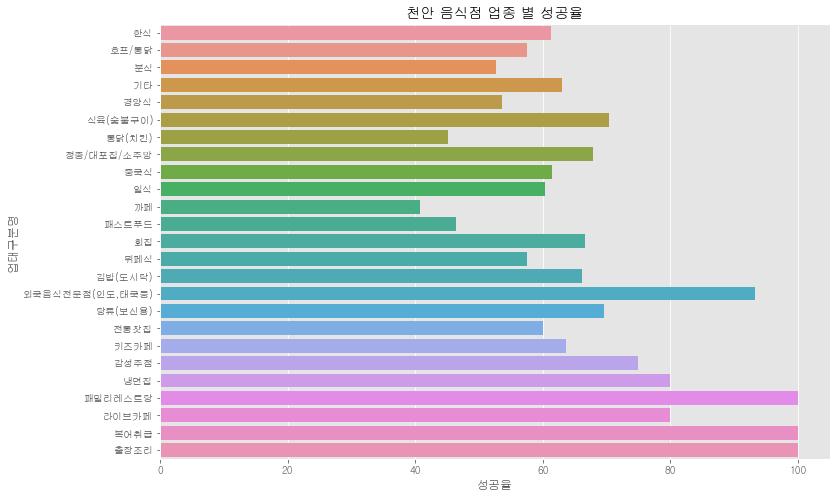

In [24]:
sns.barplot(x='성공율',y='업태구분명', data=food_kind )
plt.title('천안 음식점 업종 별 성공율')
plt.show() # 업종별 성공율 시각화 표현

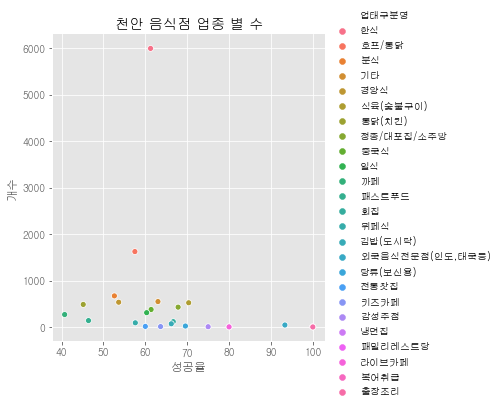

In [25]:
sns.relplot(x='성공율',y='개수', hue='업태구분명' ,data=food_kind, )
plt.title('천안 음식점 업종 별 수')
plt.show() # 업종별 수와 성공율 시각화.

In [33]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40070 entries, 0 to 40069
Data columns (total 39 columns):
상가업소번호       40070 non-null int64
상호명          40070 non-null object
지점명          5209 non-null object
상권업종대분류코드    40070 non-null object
상권업종대분류명     40070 non-null object
상권업종중분류코드    40070 non-null object
상권업종중분류명     40070 non-null object
상권업종소분류코드    40070 non-null object
상권업종소분류명     40070 non-null object
표준산업분류코드     37513 non-null object
표준산업분류명      37513 non-null object
시도코드         40070 non-null int64
시도명          40070 non-null object
시군구코드        40070 non-null int64
시군구명         40070 non-null object
행정동코드        40070 non-null int64
행정동명         40070 non-null object
법정동코드        40070 non-null int64
법정동명         40070 non-null object
지번코드         40070 non-null int64
대지구분코드       40070 non-null int64
대지구분명        40070 non-null object
지번본번지        40070 non-null int64
지번부번지        21315 non-null float64
지번주소         40070 non-null object
도로명코드        40070 non-n

In [35]:
print('동남구 - 광덕면, 구룡동, 구성동, 다가동, 대흥동, 동면, 목천읍, 문화동, 병천면, 봉명동, 북면, 사직동, 삼룡동, 성남면, 성황동,') 
print('         수신면, 신방동, 신부동, 쌍용동, 안서동, 영성동, 오룡동, 용곡동, 원성동, 유량동, 청당동, 청수동, 풍세면')
print('')
print('서북구 - 두정동, 백석동, 부대동, 불당동, 성거읍, 성성동, 성정동, 성환읍, 신당동, 업성동, 와촌동, 입장면, 직산읍, 차암동')
print('')
name = input('원하시는 동 명을 입력해주세요. : ')

동남구 - 광덕면, 구룡동, 구성동, 다가동, 대흥동, 동면, 목천읍, 문화동, 병천면, 봉명동, 북면, 사직동, 삼룡동, 성남면, 성황동,
         수신면, 신방동, 신부동, 쌍용동, 안서동, 영성동, 오룡동, 용곡동, 원성동, 유량동, 청당동, 청수동, 풍세면

서북구 - 두정동, 백석동, 부대동, 불당동, 성거읍, 성성동, 성정동, 성환읍, 신당동, 업성동, 와촌동, 입장면, 직산읍, 차암동

원하시는 동 명을 입력해주세요. : 두정동


In [36]:
food_selet=food_all.loc[food_all['소재지전체주소'].str.contains(name)]  #전체주소를 받은 인풋으로 검색해서 데이터프레임을 만듬

In [38]:
shop_selet=shop.loc[shop['법정동명'].str.contains(name)]#전체주소를 받은 인풋으로 검색해서 데이터프레임을 만듬
drop_col = ['지점명', '표준산업분류코드','표준산업분류명','지번부번지','건물부번지','동정보','층정보','호정보']

shop_selet.drop(drop_col, axis=1, inplace=True)
shop_selet

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,도로명코드,도로명,건물본번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,경도,위도
10,20574752,872,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,44,충청남도,...,441335000000,충청남도 천안시 서북구 원두정2길,15,4.410000e+24,나라빌딩,충청남도 천안시 서북구 원두정2길 15,331959,31107.0,127.135437,36.831641
13,21682401,대흥공업사,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,44,충청남도,...,441332000000,충청남도 천안시 서북구 천안대로,937,4.410000e+24,(주)대흥,충청남도 천안시 서북구 천안대로 937,331957,31114.0,127.152753,36.825917
24,21718151,행복플러스공인중개사사무소,L,부동산,L01,부동산중개,L01A01,부동산중개,44,충청남도,...,441333000000,충청남도 천안시 서북구 두정로,98,4.410000e+24,재호빌딩,충청남도 천안시 서북구 두정로 98,331958,31090.0,127.127778,36.833748
29,21721328,두정역이안공인중개사,L,부동산,L01,부동산중개,L01A01,부동산중개,44,충청남도,...,441332000000,충청남도 천안시 서북구 천안대로,1001,4.410000e+24,타이어세상,충청남도 천안시 서북구 천안대로 1001,331957,31114.0,127.151753,36.831191
30,21724947,큰나무부동산,L,부동산,L01,부동산중개,L01A01,부동산중개,44,충청남도,...,441335000000,충청남도 천안시 서북구 두정상가8길,46,4.410000e+24,NaN,충청남도 천안시 서북구 두정상가8길 46,331962,31105.0,127.142933,36.831993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40022,15031985,시엘치과,S,의료,S01,병원,S01B04,치과의원,44,충청남도,...,441333000000,충청남도 천안시 서북구 두정로,236,4.410000e+24,스타펠리스,충청남도 천안시 서북구 두정로 236,331962,31105.0,127.143044,36.833075
40032,15617949,미리별아동청소년상담센터,S,의료,S03,유사의료업,S03B07,언어치료,44,충청남도,...,441333000000,충청남도 천안시 서북구 오성로,29,4.410000e+24,정철어학원,충청남도 천안시 서북구 오성로 29,331958,31090.0,127.130595,36.830587
40035,15883908,탑골[한방병원],S,의료,S01,병원,S01B05,한방병원,44,충청남도,...,441335000000,충청남도 천안시 서북구 늘푸른4길,27,4.410000e+24,탑골,충청남도 천안시 서북구 늘푸른4길 27,331958,31099.0,127.130269,36.826674
40054,14312759,영송치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,44,충청남도,...,441335000000,충청남도 천안시 서북구 늘푸른3길,24,4.410000e+24,부강빌딩,충청남도 천안시 서북구 늘푸른3길 24,331958,31099.0,127.129782,36.826067


In [28]:
food_selet_open = food_selet.loc[food_selet['상세영업상태코드']==1]    # 원하는 동에서 영업중인 것만 추린 것
food_selet_close = food_selet.loc[food_selet['상세영업상태코드']==2]   # 원하는 동에서 폐업한 것만 추린 것
ch_selet_food_failed = (food_selet_close['번호'].count())/(food_selet['번호'].count())*100 #원하는 동의 창업 실패율
ch_selet_food_failed=round(ch_selet_food_failed,1)
ch_selet_food_failed

39.9

In [29]:
food_selet['영업기간(년)'].value_counts()

9년이상    566
5~9년    283
1~3년    245
3~5년    161
1년미만     88
Name: 영업기간(년), dtype: int64

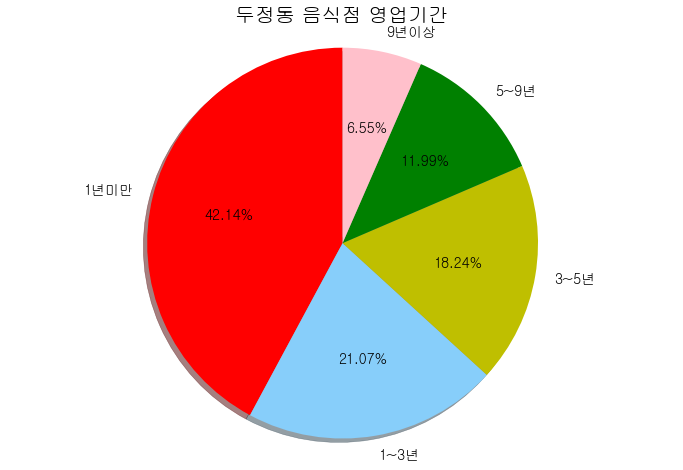

In [30]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['1년미만', '1~3년', '3~5년', '5~9년', '9년이상']
group_sizes = [food_selet['영업기간(년)'].value_counts()]
group_colors = ['r', 'lightskyblue', 'y', 'g', 'pink']
group_explodes = (0, 0, 0, 0, 0) # explode 1st slice

plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title(name+' 음식점 영업기간', fontsize=20)
plt.show()

In [31]:
ch_selet_food_mean=(food_selet['영업일수(년)'].sum())/(food_selet['영업일수(년)'].count())

<function matplotlib.pyplot.show(*args, **kw)>

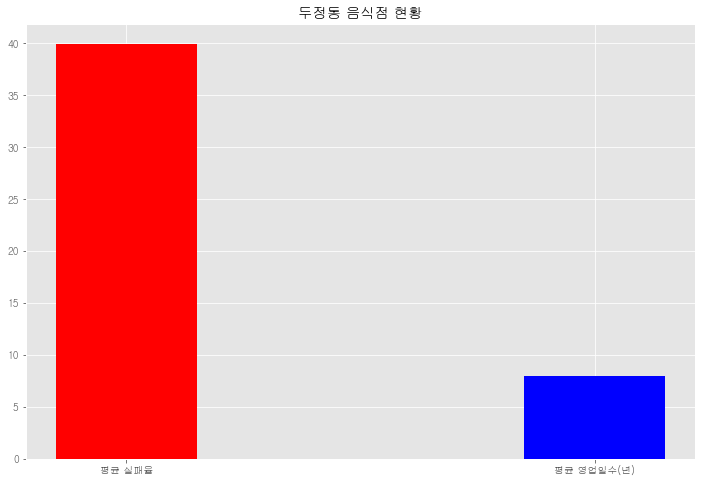

In [32]:
plt.bar(['평균 실패율', '평균 영업일수(년)'], [ch_selet_food_failed, ch_selet_food_mean], 0.3, color=('r' ,'b'))
plt.title(name+" 음식점 현황")
plt.show

In [33]:
food_selet['업태구분명']

203            한식
210        통닭(치킨)
212           뷔페식
267            한식
268            까페
           ...   
12291          분식
12300          한식
12302          기타
12310    식육(숯불구이)
12313          한식
Name: 업태구분명, Length: 1343, dtype: object

In [34]:
food_selet_kind=food_selet['업태구분명'].value_counts()

food_selet_kind.to_csv('food_selet_kind.csv', mode='w')
food_selet_kind=pd.read_csv('food_selet_kind.csv',header=None)
food_selet_kind.rename(columns={food_selet_kind.columns[0]:'업태구분명'},inplace=True)
food_selet_kind.rename(columns={food_selet_kind.columns[1]:'개수'},inplace=True)
food_selet_kind['성공율'] = np.nan
food_selet_kind

,업태구분명,개수,성공율
0,한식,520,NaN
1,호프/통닭,198,NaN
2,정종/대포집/소주방,89,NaN
3,분식,76,NaN
4,식육(숯불구이),76,NaN
5,통닭(치킨),76,NaN
6,기타,58,NaN
7,일식,55,NaN
8,경양식,54,NaN
9,까페,48,NaN


In [35]:
food_selet_KF=food_selet.loc[food_selet['업태구분명']=='한식']
food_selet_KF_open = food_selet_KF.loc[food_selet_KF['상세영업상태코드']==1]
ch_selet_KF_success = (food_selet_KF_open['번호'].count())/(food_selet_KF['번호'].count())*100

food_selet_kind.loc[food_selet_kind['업태구분명']=='한식', ['성공율']] = (round(ch_selet_KF_success,2))

food_selet_pub=food_selet.loc[food_selet['업태구분명']=='호프/통닭']
food_selet_pub_open = food_selet_pub.loc[food_selet_pub['상세영업상태코드']==1] 
ch_selet_pub_success = (food_selet_pub_open['번호'].count())/(food_selet_pub['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='호프/통닭', ['성공율']] = (round(ch_selet_pub_success,2))

food_selet_FB=food_selet.loc[food_selet['업태구분명']=='분식']
food_selet_FB_open = food_selet_FB.loc[food_selet_FB['상세영업상태코드']==1] 
ch_selet_FB_success = (food_selet_FB_open['번호'].count())/(food_selet_FB['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='분식', ['성공율']] = (round(ch_selet_FB_success,2))

food_selet_etc=food_selet.loc[food_selet['업태구분명']=='기타']
food_etc_open = food_selet_etc.loc[food_selet_etc['상세영업상태코드']==1] 
ch_etc_food_success = (food_etc_open['번호'].count())/(food_selet_etc['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='기타', ['성공율']] = (round(ch_etc_food_success,2))

food_selet_ky=food_selet.loc[food_selet['업태구분명']=='경양식']
food_ky_open = food_selet_ky.loc[food_selet_ky['상세영업상태코드']==1] 
ch_ky_food_success = (food_ky_open['번호'].count())/(food_selet_ky['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='경양식', ['성공율']] = (round(ch_ky_food_success,2))

food_selet_meat=food_selet.loc[food_selet['업태구분명']=='식육(숯불구이)']
food_meat_open = food_selet_meat.loc[food_selet_meat['상세영업상태코드']==1] 
ch_meat_food_success = (food_meat_open['번호'].count())/(food_selet_meat['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='식육(숯불구이)', ['성공율']] = (round(ch_meat_food_success,2))

food_selet_chicken=food_selet.loc[food_selet['업태구분명']=='통닭(치킨)']
food_chicken_open = food_selet_chicken.loc[food_selet_chicken['상세영업상태코드']==1] 
ch_chicken_food_success = (food_chicken_open['번호'].count())/(food_selet_chicken['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='통닭(치킨)', ['성공율']] = (round(ch_chicken_food_success,2))

food_selet_soju=food_selet.loc[food_selet['업태구분명']=='정종/대포집/소주방']
food_soju_open = food_selet_soju.loc[food_selet_soju['상세영업상태코드']==1] 
ch_soju_food_success = (food_soju_open['번호'].count())/(food_selet_soju['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='정종/대포집/소주방', ['성공율']] = (round(ch_soju_food_success,2))

food_selet_chinese=food_selet.loc[food_selet['업태구분명']=='중국식']
food_chinese_open = food_selet_chinese.loc[food_selet_chinese['상세영업상태코드']==1] 
ch_chinese_food_success = (food_chinese_open['번호'].count())/(food_selet_chinese['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='중국식', ['성공율']] = (round(ch_chinese_food_success,2))

food_selet_japan=food_selet.loc[food_selet['업태구분명']=='일식']
food_japan_open = food_selet_japan.loc[food_selet_japan['상세영업상태코드']==1] 
ch_japan_food_success = (food_japan_open['번호'].count())/(food_selet_japan['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='일식', ['성공율']] = (round(ch_japan_food_success,2))

food_selet_cafe=food_selet.loc[food_selet['업태구분명']=='까페']
food_cafe_open = food_selet_cafe.loc[food_selet_cafe['상세영업상태코드']==1] 
ch_cafe_food_success = (food_cafe_open['번호'].count())/(food_selet_cafe['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='까페', ['성공율']] = (round(ch_cafe_food_success,2))

food_selet_fast=food_selet.loc[food_selet['업태구분명']=='패스트푸드']
food_fast_open = food_selet_fast.loc[food_selet_fast['상세영업상태코드']==1] 
ch_fast_food_success = (food_fast_open['번호'].count())/(food_selet_fast['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='패스트푸드', ['성공율']] = (round(ch_fast_food_success,2))

food_selet_sushi=food_selet.loc[food_selet['업태구분명']=='회집']
food_sushi_open = food_selet_sushi.loc[food_selet_sushi['상세영업상태코드']==1] 
ch_sushi_food_success = (food_sushi_open['번호'].count())/(food_selet_sushi['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='회집', ['성공율']] = (round(ch_sushi_food_success,2))

food_selet_buffet=food_selet.loc[food_selet['업태구분명']=='뷔페식']
food_buffet_open = food_selet_buffet.loc[food_selet_buffet['상세영업상태코드']==1] 
ch_buffet_food_success = (food_buffet_open['번호'].count())/(food_selet_buffet['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='뷔페식', ['성공율']] = (round(ch_buffet_food_success,2))

food_selet_gim=food_selet.loc[food_selet['업태구분명']=='김밥(도시락)']
food_gim_open = food_selet_gim.loc[food_selet_gim['상세영업상태코드']==1] 
ch_gim_food_success = (food_gim_open['번호'].count())/(food_selet_gim['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='김밥(도시락)', ['성공율']] = (round(ch_gim_food_success,2))

food_selet_foreign=food_selet.loc[food_selet['업태구분명']=='외국음식전문점(인도,태국등)']
food_foreign_open = food_selet_foreign.loc[food_selet_foreign['상세영업상태코드']==1] 
ch_foreign_food_success = (food_foreign_open['번호'].count())/(food_selet_foreign['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='외국음식전문점(인도,태국등)', ['성공율']] = (round(ch_foreign_food_success,2))

food_selet_tea=food_selet.loc[food_selet['업태구분명']=='전통찻집']
food_tea_open = food_selet_tea.loc[food_selet_tea['상세영업상태코드']==1] 
ch_tea_food_success = (food_tea_open['번호'].count())/(food_selet_tea['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='전통찻집', ['성공율']] = (round(ch_tea_food_success,2))

food_selet_kids=food_selet.loc[food_selet['업태구분명']=='키즈카페']
food_kids_open = food_selet_kids.loc[food_selet_kids['상세영업상태코드']==1] 
ch_kids_food_success = (food_kids_open['번호'].count())/(food_selet_kids['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='키즈카페', ['성공율']] = (round(ch_kids_food_success,2))

food_selet_bar=food_selet.loc[food_selet['업태구분명']=='감성주점']
food_bar_open = food_selet_bar.loc[food_selet_bar['상세영업상태코드']==1] 
ch_bar_food_success = (food_bar_open['번호'].count())/(food_selet_bar['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='감성주점', ['성공율']] = (round(ch_bar_food_success,2))

food_selet_family=food_selet.loc[food_selet['업태구분명']=='패밀리레스트랑']
food_family_open = food_selet_family.loc[food_selet_family['상세영업상태코드']==1] 
ch_family_food_success = (food_family_open['번호'].count())/(food_selet_family['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='패밀리레스트랑', ['성공율']] = (round(ch_family_food_success,2))

food_selet_live=food_selet.loc[food_selet['업태구분명']=='라이브카페']
food_live_open = food_selet_live.loc[food_selet_live['상세영업상태코드']==1] 
ch_live_food_success = (food_live_open['번호'].count())/(food_selet_live['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='라이브카페', ['성공율']] = (round(ch_live_food_success,2))

food_selet_NM=food_selet.loc[food_selet['업태구분명']=='냉면집']
food_NM_open = food_selet_NM.loc[food_selet_NM['상세영업상태코드']==1] 
ch_NM_food_success = (food_NM_open['번호'].count())/(food_selet_NM['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='냉면집', ['성공율']] = (round(ch_NM_food_success,2))

food_selet_fugu=food_selet.loc[food_selet['업태구분명']=='복어취급']
food_fugu_open = food_selet_fugu.loc[food_selet_fugu['상세영업상태코드']==1] 
ch_fugu_food_success = (food_fugu_open['번호'].count())/(food_selet_fugu['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='복어취급', ['성공율']] = (round(ch_fugu_food_success,2))

food_selet_soup=food_selet.loc[food_selet['업태구분명']=='탕류(보신용)']
food_soup_open = food_selet_soup.loc[food_selet_soup['상세영업상태코드']==1] 
ch_soup_food_success = (food_soup_open['번호'].count())/(food_selet_soup['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='탕류(보신용)', ['성공율']] = (round(ch_soup_food_success,2))

food_selet_trip=food_selet.loc[food_selet['업태구분명']=='출장조리']
food_trip_open = food_selet_trip.loc[food_selet_trip['상세영업상태코드']==1] 
ch_trip_food_success = (food_trip_open['번호'].count())/(food_selet_trip['번호'].count())*100 

food_selet_kind.loc[food_selet_kind['업태구분명']=='출장조리', ['성공율']] = (round(ch_trip_food_success,2))

In [36]:
food_selet_kind

,업태구분명,개수,성공율
0,한식,520,62.31
1,호프/통닭,198,55.56
2,정종/대포집/소주방,89,68.54
3,분식,76,57.89
4,식육(숯불구이),76,76.32
5,통닭(치킨),76,48.68
6,기타,58,55.17
7,일식,55,63.64
8,경양식,54,53.70
9,까페,48,45.83


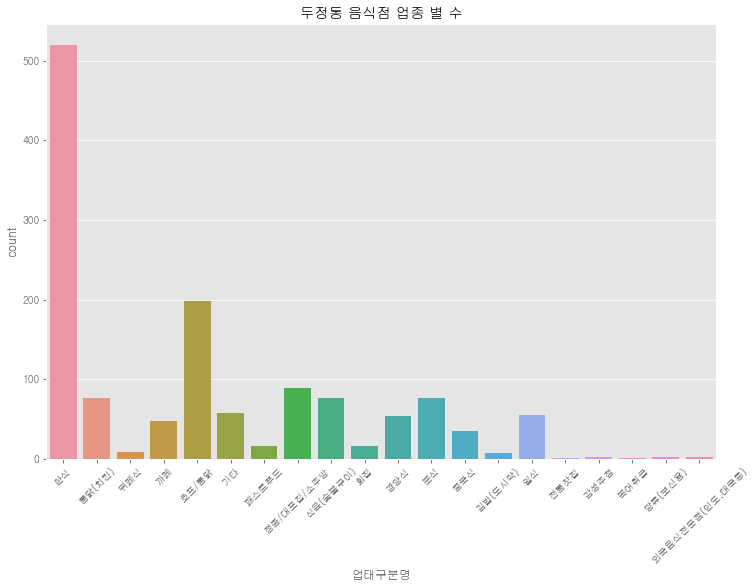

In [37]:
plt.xticks(rotation=45)
g=sns.countplot(x='업태구분명', data=food_selet)
plt.title(name+' 음식점 업종 별 수')
plt.show()

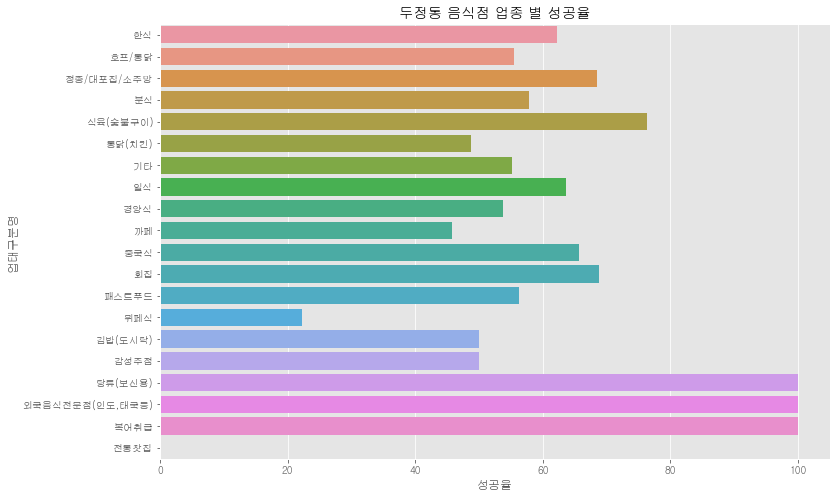

In [38]:
sns.barplot(x='성공율',y='업태구분명', data=food_selet_kind )
plt.title(name+' 음식점 업종 별 성공율')
plt.show()

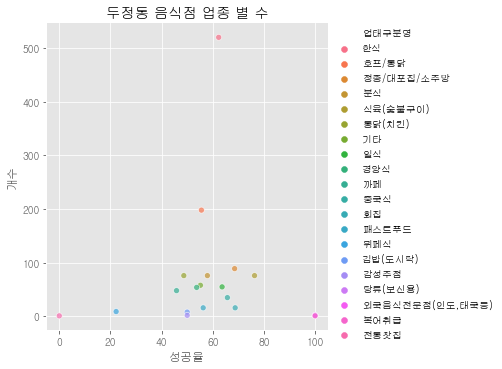

In [39]:
sns.relplot(x='성공율',y='개수', hue='업태구분명' ,data=food_selet_kind, alpha=0.7)
plt.title(name+' 음식점 업종 별 수')
plt.show()

203          항아리보쌈
210       달구새끼치킨호프
212           소탄조개
267        흥부네박터졌네
268             마블
           ...    
12291         김밥나라
12300          더먹자
12302          피엔피
12310    양념게장앤간장게장
12313           모야
Name: 사업장명, Length: 1343, dtype: object

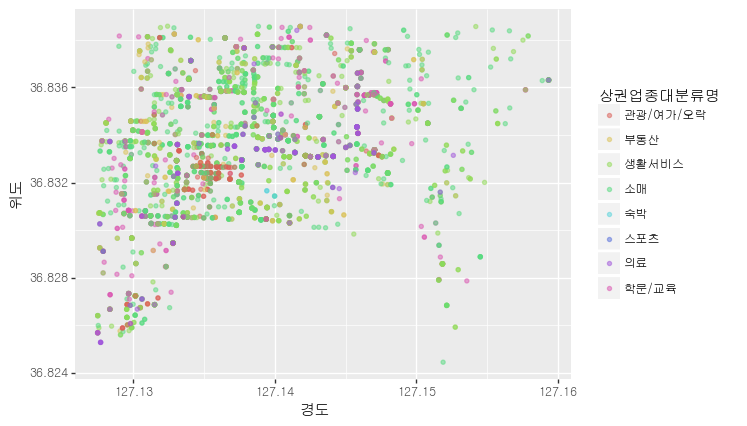

<ggplot: (142373820729)>

In [56]:
shop_selet_n = shop_selet.loc[shop_selet['상권업종대분류명']!='음식']



(ggplot(shop_selet_n)
    +aes(x='경도', y='위도', color='상권업종대분류명')
    +geom_point(alpha=0.5, size=1.2)
    +theme(text=element_text(family='gulim'))
    +scale_fill_gradient(low = 'red', high = 'blue')
)

In [41]:
if (ch_food_failed-10) < ch_selet_food_failed < (ch_food_failed-5) :
    print(name + "의 창업 위험 지수는 [보통] 입니다.")
elif (ch_food_failed-5) < ch_selet_food_failed < (ch_food_failed+5) :
    print(name + "의 창업 위험 지수는 [의심] 입니다.")
elif (ch_food_failed+5) < ch_selet_food_failed < (ch_food_failed+10) :
    print(name + "의 창업 위험 지수는 [저위험] 입니다.")
elif (ch_food_failed+10) < ch_selet_food_failed < (ch_food_failed+15) :
    print(name + "의 창업 위험 지수는 [중위험] 입니다.")
elif (ch_food_failed+15) < ch_selet_food_failed :
    print(name + "의 창업 위험 지수는 [고위험] 입니다.")
else : 
    print(name + "의 창업 위험 지수는 [안전] 입니다. 하지만 인구 현황을 살펴봐주세요." )
    

두정동의 창업 위험 지수는 [의심] 입니다.
